In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

**outlier-datapoint which is outside of the distribution
finding**

1.iqr

2.z-score range of -3 to +3

3.box plot

4.scatter plot

**A scatter plot helps visually see extreme values.**

**A box plot is useful for spotting extreme values using quartiles.**

z-score

z=x-mean/s.d

In [9]:
#creating sample dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#normal data with mean=50,std=10
outliers=np.array([50,170,15,160])#outliers
data=np.concatenate([data,outliers])#adding outliers to dataset

In [10]:
#creating a dataframe
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [11]:
print(df.tail())

         Values
99    47.654129
100   50.000000
101  170.000000
102   15.000000
103  160.000000


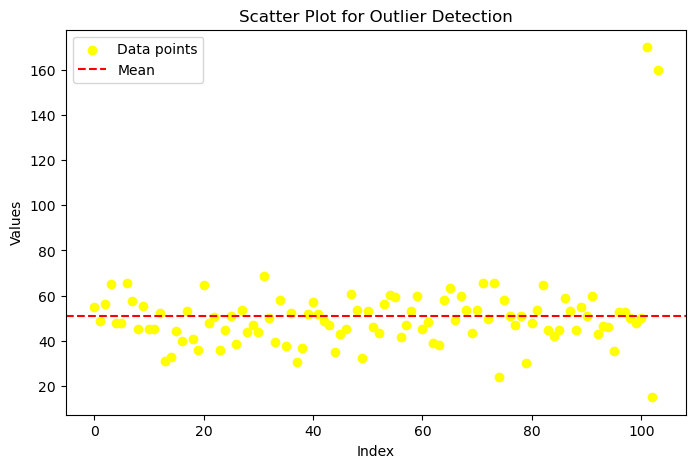

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='yellow',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot for Outlier Detection')
plt.legend()
plt.show()

z-score
z = (X – μ) / σ
X=Data point
μ=Mean of Dataset
σ=Standard Deviation of dataset


In [39]:
df['z-score']=zscore(df['Values'])
df['Outlier_Z']=df['z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])


     Values Outlier_Z   z-score Outlier_IQR
101   170.0   Outlier  6.409986     Outlier
103   160.0   Outlier  5.871891     Outlier


***Interquartile Range (IQR)***

IQR=Q3-Q1

1.CALCULATE Q1(25th percentile) and  Q3(75th percentile)

2.IQR=Q3-Q1

3.lower and upper bounds

**lower bound=Q1-1.5*IQR**

**upper bound=Q3+1.5*IQR**

In [38]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
#defining bounds
IQR = Q3 - Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#identifying outliers
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if (x<lower_bound or x>upper_bound)else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])


         Values Outlier_Z   z-score Outlier_IQR
74    23.802549    Normal -1.456837     Outlier
101  170.000000   Outlier  6.409986     Outlier
102   15.000000    Normal -1.930498     Outlier
103  160.000000   Outlier  5.871891     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

**The Interquartile Range (IQR) is calculated as:**
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [44]:
import pandas as pd
#creating a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50,std=10
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])#Merge normal data with outliers
#Compute 5-step
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
#compute IQR
IQR=Q3-Q1
#Compute outlier Boundaries
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]
#print Results
print(f'5-Number Summary:\nMin:{min_value}\nQ1:{Q1}\nMedian(Q2):{Q2}\nQ3:{Q3}\nMax:{max_value}')
print(f'IQR:{IQR}')
print(f'Lower Bound:{lower_bound},Upper Bound:{upper_bound}')
print(f'Outliers:{outliers}')

5-Number Summary:
Min:5.0
Q1:43.874401021766715
Median(Q2):48.73043708220287
Q3:55.00852473036764
Max:120.0
IQR:11.134123708600924
Lower Bound:27.17321545886533,Upper Bound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
